In [138]:
import matlab
import matlab.engine
import time
import matplotlib.pyplot as plt
import numpy as np
from numpy import random
import os
import pandas as pd
import scipy.io as scio 
from pandas_datareader import data
import scipy.io

![iamge](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q1.PNG)

In [2]:
#######################################################################################################################################

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q2.PNG)

In [3]:
# Assets A1.A2.A3

In [4]:
m = np.array([[0.10],[0.20],[0.15]]) # construct matrix

C = np.array([[0.005,-0.010,0.004],[-0.010,0.040,-0.002],[0.004,-0.002,0.023]]) # construct matrix

E = np.zeros((100,1))   # Expected return E from the portfoli
V = np.zeros((100,1))   # Variance
w = np.zeros((100,3))   # Weight

N = 100
y = random.rand(N,3)  # 100X3 random matrix between 0~1
for i in range (0,N):
    # calculate the weight
    w[i] = y[i,] / sum(y[i,]) 
    # calculate the expected return
    E[i] = np.dot(w[i] , m)  
    # calculate the Variance
    kk = np.dot(w[i] , C)
    w_T = np.reshape(w[i], (3, -1)) #transposition
    V[i] = np.sqrt(np.dot(kk , w_T))

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/S1.PNG)

In [50]:
eng = matlab.engine.start_matlab("-desktop") # Use Finance toolbox in Matlab to calculate the Efficient Portfolio

p = Portfolio;

p = setAssetMoments(p, m, C);

p = setDefaultConstraints(p);

[y,x] = plotFrontier(p);

In [8]:
# obtain data from matlab
x1 = eng.workspace['x']
y1 = eng.workspace['y']

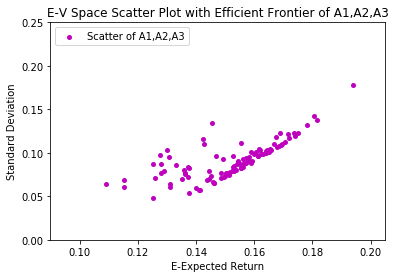

In [9]:
f1 = plt.figure(1)
#plt.plot(x,y, linewidth = '2', label = "Efficient Frontier of A1,A2,A3")
plt.scatter(E,V, c='m', marker='.', linewidths= '2', label = "Scatter of A1,A2,A3")
plt.legend(loc='upper left')
#plt.grid()
plt.title('E-V Space Scatter Plot with Efficient Frontier of A1,A2,A3')  
plt.ylabel("Standard Deviation")  
plt.xlabel("E-Expected Return")
# plt with same scale
plt.ylim(0,0.25)
plt.xlim(0.09,0.205)
plt.savefig("E-V Space Scatter Plot of A1,A2,A3.PNG", dpi = 600)
plt.show()

In [52]:
# Assets A1.A2

In [82]:
# obtain data from matlab
x2 = eng.workspace['x']
y2 = eng.workspace['y']

In [65]:
# Assets A2.A3

In [83]:
# obtain data from matlab
x3 = eng.workspace['x']
y3 = eng.workspace['y']

In [ ]:
# Assets A1.A3

In [84]:
# obtain data from matlab
x4 = eng.workspace['x']
y4 = eng.workspace['y']

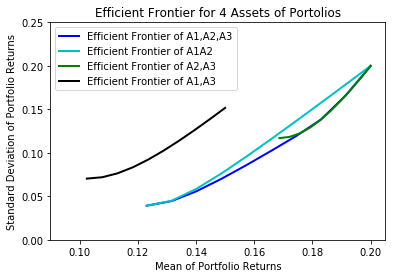

In [91]:
f2 = plt.figure(2)
plt.plot(x1,y1, linewidth = '2', color='b', label = "Efficient Frontier of A1,A2,A3")
plt.plot(x2,y2, linewidth = '2', color='c', label = "Efficient Frontier of A1A2")
plt.plot(x3,y3, linewidth = '2', color='g', label = "Efficient Frontier of A2,A3")
plt.plot(x4,y4, linewidth = '2', color='k', label = "Efficient Frontier of A1,A3")
#plt.grid()
plt.legend(loc='upper left')
plt.title('Efficient Frontier for 4 Assets of Portolios')  
plt.ylabel("Standard Deviation of Portfolio Returns")  
plt.xlabel("Mean of Portfolio Returns")
# plt with same scale
plt.ylim(0,0.25)
plt.xlim(0.09,0.205)
plt.savefig("Efficient Frontier for 4 Assets of Portolios.PNG", dpi = 600)
plt.show()

In [43]:
######################################################################################################################################

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q3.PNG)

Set the working path of Matlab to cvx in Matlab install address, Run **vsx_setup.m**

**[NaiveMV](https://github.com/Trouble404/Computational-Finance-coursework/blob/master/NativeMV.m)** To **[NaiveMV_CVX](https://github.com/Trouble404/Computational-Finance-coursework/blob/master/NativeMV_CVX.m)**

Call **linprog** and **quadprog** by **CVX**

MaxReturnWeights = linprog(-ERet, [], [], V1, 1, V0) To: 
![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/linprog_cvx.PNG)

MinVarWeights = quadprog(ECov,V0,[],[],V1,1,V0,[],[],options)  To:
![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/quadprog_csv.PNG)

Running this two function by m and C in Q2


In [52]:
# obtain data from matlab
x5 = eng.workspace['PRoR1']
y5 = eng.workspace['PRisk1']
x6 = eng.workspace['PRoR2']
y6 = eng.workspace['PRisk2']
x7 = eng.workspace['D1']
y7 = eng.workspace['D2']

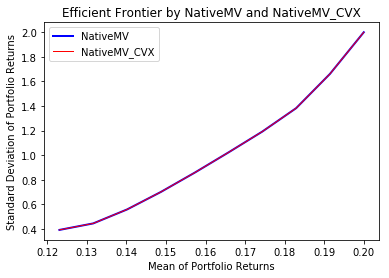

In [70]:
f3 = plt.figure(3)
plt.plot(x5,y5, linewidth = '2', color='b', label = "NativeMV")
plt.plot(x6,y6, linewidth = '1', color='r', label = "NativeMV_CVX")
#plt.grid()
plt.legend(loc='upper left')
plt.title('Efficient Frontier by NativeMV and NativeMV_CVX')  
plt.ylabel("Standard Deviation of Portfolio Returns")  
plt.xlabel("Mean of Portfolio Returns")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Efficient Frontier by NativeMV and NativeMV_CVX.PNG", dpi = 600)
plt.show()

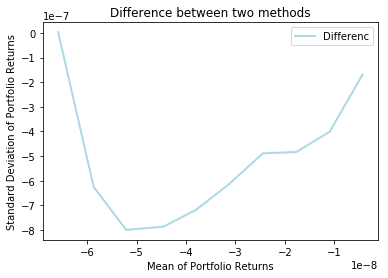

In [71]:
f4 = plt.figure(4)
plt.plot(x7,y7, linewidth = '2', color='lightblue', label = "Differenc")
#plt.grid()
plt.legend(loc='upper right')
plt.title('Difference between two methods')  
plt.ylabel("Standard Deviation of Portfolio Returns")  
plt.xlabel("Mean of Portfolio Returns")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Difference between two methods.PNG", dpi = 600)
plt.show()

In [ ]:
######################################################################################################################################

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/Q4.PNG)

30 companys's stock from 21/02/2015 to 21/02/2018 are obtain from [Yahoo Finance](https://uk.finance.yahoo.com/quote/%5EFTSE/components?p=%5EFTSE), those data can be download at [here](https://github.com/Trouble404/Computational-Finance-coursework/tree/master/FTSE-100)

In [47]:
path = "FTSE-100" #文件夹目录  
files= os.listdir(path) #得到文件夹下的所有文件名称  
files

['AHT.L.csv',
 'ANTO.L.csv',
 'BATS.L.csv',
 'BCS.csv',
 'CCH.L.csv',
 'CCL.L.csv',
 'CNA.L.csv',
 'CPG.L.csv',
 'DLG.L.csv',
 'EXPN.L.csv',
 'EZJ.L.csv',
 'GFS.L.csv',
 'HSBA.L.csv',
 'MDC.L.csv',
 'NMC.L.csv',
 'PPB.L.csv',
 'PRU.L.csv',
 'RTO.L.csv',
 'SDR.L.csv',
 'SHP.L.csv',
 'SKY.L.csv',
 'SMIN.L.csv',
 'SSE.L.csv',
 'STJ.L.csv',
 'SVT.L.csv',
 'TPK.L.csv',
 'TSCO.L.csv',
 'TUI.L.csv',
 'TW.L.csv',
 'VOD.L.csv']

In [30]:
address = path +  "/"+ files[0]
test = pd.read_csv(address)
T = len(test) # time serise
train_T = int(T/2) # half time 's data used to calculate E and V
train_T

379

In [41]:
stock

,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-02-23,145.899994,146.800003,144.744003,145.300003,139.035782,10813125
1,2015-02-24,146.000000,146.367996,138.143997,141.500000,135.399628,43038132
2,2015-02-25,141.300003,142.203995,138.800003,141.399994,135.303925,19759549
3,2015-02-26,141.300003,144.809998,140.000000,144.399994,138.174591,13663576
4,2015-02-27,144.100006,145.500000,142.600006,144.500000,138.270279,13515930
5,2015-03-02,143.399994,148.000000,143.335999,144.899994,138.653030,17316715
6,2015-03-03,147.699997,149.899994,144.899994,147.899994,141.523682,24993210
7,2015-03-04,146.500000,149.199997,145.600006,149.199997,142.767654,20662860
8,2015-03-05,149.100006,152.399994,148.699997,149.000000,142.576279,21933122
9,2015-03-06,149.600006,152.729996,149.134003,149.300003,142.863342,16341322


In [40]:
numFile = len(files)
returns = np.zeros((numFile,train_T))   # Expected return E from the portfoli
ERet = np.zeros((numFile,1))   # Variance
ECov = np.zeros((numFile,1))   # Weight

for n in range (0, numFile):
    address = path +  "/"+ files[n]
    stock=pd.read_csv(address)
    stock.fillna(value=192)
    for k in range(0,train_T):
        returns[n:n+1 , k] = stock['Close'][k] - stock['Open'][k] # return = close - open
        
print (len(returns)) # rows  
print (len(returns[0])) # cloumn

30
379


In [273]:
returns = np.transpose(returns)
print (len(returns)) # rows  
print (len(returns[0])) # cloumn

379
30


random choose 3 for asstes

In [322]:
choices = 30 * random.rand(1,3)
choice_1 = int(choices[0,0])
print(choice_1)
choice_2 = int(choices[0,1])
print(choice_2)
choice_3 = int(choices[0,2])
print(choice_3)

10
22
25


In [323]:
asstes = [returns[:,choice_1],returns[:,choice_2],returns[:,choice_3]]
#asstes = np.transpose(asstes)
print(len(asstes))
print(len(asstes[0]))

3
379


![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/qq1.PNG)

In [324]:
asstes_m = np.zeros((3,1))
for n in range (0, 3):
    asstes_m[n ,] = asstes[n].sum() / train_T  #上面的式子
print(asstes_m)

[[-2.36279683]
 [-0.6701847 ]
 [ 0.19656992]]


![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/qq2.PNG)

In [327]:
asstes_cov = np.cov(asstes)
print(asstes_cov)

[[649.91101967  71.36468149 171.02586869]
 [ 71.36468149 255.46633092 108.39729831]
 [171.02586869 108.39729831 240.91165487]]


USING CVX TO SLOVE WEIGHTS
![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/S4_2.PNG)

In [330]:
weight_1 = np.array([1/3,1/3,1/3])
# obtain data from matlab
weight_2 = eng.workspace['weight']
weight_2

matlab.double([[1.8536520573694815e-09],[0.019117192886522544],[0.9808828052598254]])

In [331]:
weight_1

array([0.33333333, 0.33333333, 0.33333333])

In [48]:
numFile = len(files)
all_returns = np.zeros((numFile,T))   # Expected return E from the portfoli

for n in range (0, numFile):
    address = path +  "/"+ files[n]
    stock=pd.read_csv(address)
    stock.fillna(value=192)
    for k in range(0,T):
        all_returns[n:n+1 , k] = stock['Close'][k] - stock['Open'][k] # return = close - open
all_returns = np.transpose(all_returns)       
print (len(all_returns)) # rows  
print (len(all_returns[0])) # cloumn

758
30


In [335]:
all_asstes = [all_returns[:,choice_1],all_returns[:,choice_2],all_returns[:,choice_3]]
#asstes = np.transpose(asstes)
print(len(all_asstes))
print(len(all_asstes[0]))

3
758


In [203]:
# calculate return per days
def shouru(asstes,weight):
    kk = []
    num_touzi = len(weight)
    # daily return
    for n in range(0,num_touzi):
        sum_return = asstes[n] * weight[n]
        kk.append(sum_return)
    return kk    

In [387]:
method_1 = shouru(all_asstes, weight_2) # markowitz w
result_1 = method_1[0] + method_1[1] + method_1[2]

method_2 = shouru(all_asstes, weight_1) # 1/N
result_2 = method_2[0] + method_2[1] + method_2[2]

print(result_1.sum())
print(result_2.sum())

0.1860067657801494
-282.800008


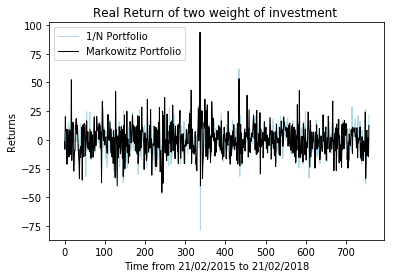

In [401]:
f6 = plt.figure(6)
time = np.arange(T)  
plt.plot(time,result_2, linewidth = '1', color='lightblue', label = "1/N Portfolio")
plt.plot(time,result_1, linewidth = '1', color='k', label = "Markowitz Portfolio")

#plt.grid()
plt.legend(loc='upper left')
plt.title('Real Return of two weight of investment ')  
plt.xlabel("Time from 21/02/2015 to 21/02/2018")  
plt.ylabel("Returns")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Real Return of two weight of investment.PNG", dpi = 600)
plt.show()

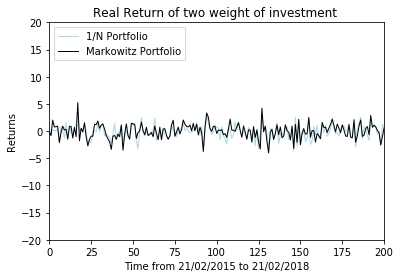

In [427]:
f6 = plt.figure(6)
time = np.arange(T)  
plt.plot(time,result_2/10, linewidth = '1', color='lightblue', label = "1/N Portfolio")
plt.plot(time,result_1/10, linewidth = '1', color='k', label = "Markowitz Portfolio")

#plt.grid()
plt.legend(loc='upper left')
plt.title('Real Return of two weight of investment ')  
plt.xlabel("Time from 21/02/2015 to 21/02/2018")  
plt.ylabel("Returns")
# plt with same scale
plt.ylim(-20,20)
plt.xlim(0,200)
#plt.savefig("Real Return of two weight of investment.PNG", dpi = 600)
plt.show()

In [404]:
half_result_1 = result_1[train_T:T]
half_result_2 = result_2[train_T:T]

print(half_result_1.sum())
print(half_result_2.sum())

-68.0339935729547
75.53332533333337


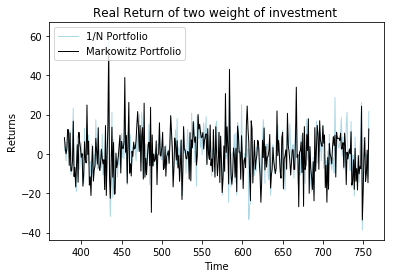

In [407]:
f7 = plt.figure(7)
time = np.arange(T)  
time = time[train_T:T]
plt.plot(time,half_result_2, linewidth = '1', color='lightblue', label = "1/N Portfolio")
plt.plot(time,half_result_1, linewidth = '1', color='k', label = "Markowitz Portfolio")

#plt.grid()
plt.legend(loc='upper left')
plt.title('Real Return of two weight of investment ')  
plt.xlabel("Time")  
plt.ylabel("Returns")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Real Return of two weight of investment- Remainder time.PNG", dpi = 600)
plt.show()

Compute sharp ratio

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/s4_3.PNG)

In [419]:
h_return = all_returns[train_T:T]
h_asstes = [h_return[:,choice_1],h_return[:,choice_2],h_return[:,choice_3]]
#asstes = np.transpose(asstes)
print(len(h_asstes))
print(len(h_asstes[0]))

3
379


In [420]:
dataNew = 'returns.mat' 
scio.savemat(dataNew, {'A':h_asstes})  

In [421]:
# obtain data from matlab
rf_1 = eng.workspace['rf_1']
rf_2 = eng.workspace['rf_2']

In [422]:
print(rf_1)
print(rf_2)

-0.01715628460818387
0.016131812018194136


In [ ]:
#####################################################################################################################################

In [92]:
for n in range (0, numFile):
    ERet[n:n+1 ,] = returns[n:n+1].sum() / train_T  #上面的式子
print(ERet)

[[-6.59630607e-02]
 [-5.18205393e-01]
 [ 4.10290237e-01]
 [-1.42743641e-02]
 [ 7.07124011e-01]
 [-8.41688654e-01]
 [-1.95250937e-01]
 [-3.21056216e-01]
 [-7.96628575e-02]
 [-1.26649077e-01]
 [-2.36279683e+00]
 [-2.37467414e-01]
 [-7.82929501e-01]
 [-5.40997427e-01]
 [ 2.72295546e-01]
 [ 1.94665701e+01]
 [-1.22258571e+00]
 [            nan]
 [ 1.36675391e-01]
 [-1.39841689e+00]
 [-5.80474934e-02]
 [-1.70448549e+00]
 [-6.70184697e-01]
 [-1.55408971e-03]
 [-1.05277045e+00]
 [ 1.96569921e-01]
 [-2.79884509e-01]
 [-1.34432718e+00]
 [-7.91345646e-04]
 [-3.03825604e-01]]


In [194]:
print(len(ERet))
print(len(ERet[0]))

30
1


![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/qq2.PNG)

In [93]:
for n in range (0, numFile):
    #上面的式子
    first = returns[n:n+1] - ERet[n]
    second = np.transpose(first)
    ECov[n:n+1 ,] = np.dot(first,second).sum() / train_T
print(ECov)

[[3.59101190e+02]
 [1.83038733e+02]
 [1.73372942e+03]
 [3.11701152e-02]
 [4.55695226e+02]
 [2.55576913e+03]
 [1.04531112e+01]
 [1.62162573e+02]
 [1.78769225e+01]
 [2.05593459e+02]
 [6.48196215e+02]
 [1.34219224e+01]
 [3.80102032e+01]
 [2.84219854e+02]
 [5.84421741e+02]
 [3.43316979e+04]
 [5.37265678e+02]
 [           nan]
 [3.97071238e+00]
 [1.97588612e+03]
 [5.99056127e+03]
 [1.47567025e+02]
 [2.54792277e+02]
 [2.47470752e-04]
 [2.79422017e+02]
 [2.40276004e+02]
 [1.13581541e+01]
 [3.62583945e+02]
 [1.19442986e+01]
 [7.21541351e+00]]


There are 1 missing value displayed as **nan** , use first value to fill it

In [95]:
where_are_nan = np.isnan(ERet) 
ERet[where_are_nan] = ERet[0]
ERet

array([[-6.59630607e-02],
       [-5.18205393e-01],
       [ 4.10290237e-01],
       [-1.42743641e-02],
       [ 7.07124011e-01],
       [-8.41688654e-01],
       [-1.95250937e-01],
       [-3.21056216e-01],
       [-7.96628575e-02],
       [-1.26649077e-01],
       [-2.36279683e+00],
       [-2.37467414e-01],
       [-7.82929501e-01],
       [-5.40997427e-01],
       [ 2.72295546e-01],
       [ 1.94665701e+01],
       [-1.22258571e+00],
       [-6.59630607e-02],
       [ 1.36675391e-01],
       [-1.39841689e+00],
       [-5.80474934e-02],
       [-1.70448549e+00],
       [-6.70184697e-01],
       [-1.55408971e-03],
       [-1.05277045e+00],
       [ 1.96569921e-01],
       [-2.79884509e-01],
       [-1.34432718e+00],
       [-7.91345646e-04],
       [-3.03825604e-01]])

In [96]:
where_are_nan = np.isnan(ECov) 
ECov[where_are_nan] = ECov[0]
ECov

array([[3.59101190e+02],
       [1.83038733e+02],
       [1.73372942e+03],
       [3.11701152e-02],
       [4.55695226e+02],
       [2.55576913e+03],
       [1.04531112e+01],
       [1.62162573e+02],
       [1.78769225e+01],
       [2.05593459e+02],
       [6.48196215e+02],
       [1.34219224e+01],
       [3.80102032e+01],
       [2.84219854e+02],
       [5.84421741e+02],
       [3.43316979e+04],
       [5.37265678e+02],
       [3.59101190e+02],
       [3.97071238e+00],
       [1.97588612e+03],
       [5.99056127e+03],
       [1.47567025e+02],
       [2.54792277e+02],
       [2.47470752e-04],
       [2.79422017e+02],
       [2.40276004e+02],
       [1.13581541e+01],
       [3.62583945e+02],
       [1.19442986e+01],
       [7.21541351e+00]])

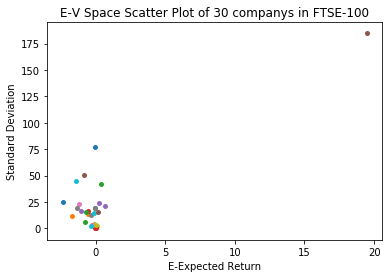

In [134]:
ECov_str = np.sqrt(ECov)

f5 = plt.figure(5)

for n in range (0, numFile):
    plt.scatter(ERet[n],ECov_str[n], marker='.', linewidths= '2', label = files[n])
#plt.legend( loc='best')
#plt.grid()
plt.title('E-V Space Scatter Plot of 30 companys in FTSE-100')  
plt.ylabel("Standard Deviation")  
plt.xlabel("E-Expected Return")
# plt with same scale
#plt.ylim(0,80)
#plt.xlim(0.09,0.205)
plt.savefig("E-V Space Scatter Plot of 30 companys in FTSE-100.PNG", dpi = 600)
plt.show()

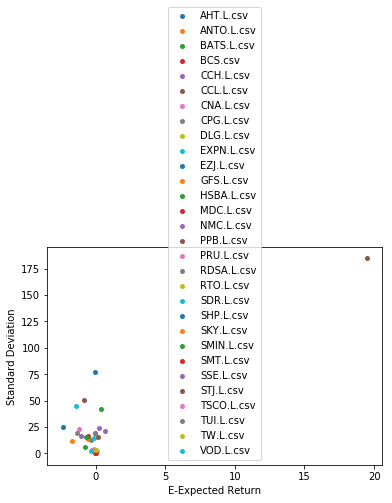

In [140]:
f6 = plt.figure(6)

for n in range (0, numFile):
    plt.scatter(ERet[n],ECov_str[n], marker='.', linewidths= '2', label = files[n])
plt.legend( loc='best')
#plt.grid
plt.ylabel("Standard Deviation")  
plt.xlabel("E-Expected Return")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("LABEL.PNG", dpi = 600)
plt.show()

combine legend to fig.

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/E-V%20Space%20Scatter%20Plot%20of%2030%20companys%20in%20FTSE-100.PNG)

Select three stocks at random

In [174]:
choices = 30 * random.rand(1,3)
choice_1 = int(choices[0,0])
print(choice_1)
choice_2 = int(choices[0,1])
print(choice_2)
choice_3 = int(choices[0,2])
print(choice_3)

15
14
11


In [191]:
m_1 = ERet[choice_1]
m_2 = ERet[choice_2]
m_3 = ERet[choice_3]

str_1 = ECov_str[choice_1]
str_2 = ECov_str[choice_2]
str_3 = ECov_str[choice_3]

m = np.zeros((3,1))
m[0,0] = float(m_1)
m[1,0] = float(m_2)
m[2,0] = float(m_3)
print(m)

str_ = np.zeros((3,1))
str_[0,0] = str_1
str_[1,0] = str_2
str_[2,0] = str_3
print(str_)

[[19.46657015]
 [ 0.27229555]
 [-0.23746741]]
[[185.28814828]
 [ 24.17481625]
 [  3.66359419]]


In [178]:
# tarnsofm to matlab
eng.workspace['m_1'] = float(m_1)
eng.workspace['m_2'] = float(m_2)
eng.workspace['m_3'] = float(m_3)
eng.workspace['str_1'] = float(str_1)
eng.workspace['str_2'] = float(str_2)
eng.workspace['str_3'] = float(str_3)

In [201]:
#obtain data from matlab
x8 = eng.workspace['x']
y8 = eng.workspace['y']
pwgt = eng.workspace['pwgt']

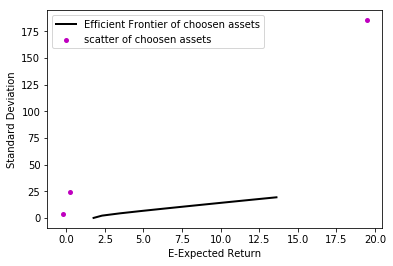

In [204]:
f7 = plt.figure(7)

plt.scatter(m,str_, marker='.',c='m', linewidths= '2', label = 'scatter of choosen assets')
plt.plot(x8,y8, linewidth = '2', color='k', label = "Efficient Frontier of choosen assets")
plt.legend( loc='best')
#plt.grid
plt.ylabel("Standard Deviation")  
plt.xlabel("E-Expected Return")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Efficient Frontier of choosen assets.PNG", dpi = 600)
plt.show()

In [205]:
print(pwgt)

[[0.01688047984392365,0.12561987865774177,0.23435927747155993,0.34309867628537805,0.45183807509919627,0.5605774739130144,0.6693168727268325,0.7780562715406506,0.8882452021470035,1.0],[0.12938062570860195,0.13418105164668037,0.13898147758475876,0.14378190352283704,0.14858232946091546,0.153382755398994,0.15818318133707193,0.16298360727515052,0.1117547978529973,0.0],[0.8537388944474744,0.7401990696955777,0.6266592449436812,0.5131194201917847,0.39957959543988847,0.2860397706879921,0.1724999459360938,0.05896012118419851,0.0,0.0]]


In [ ]:
##################################################################################################

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/s5_1.PNG)

![image](https://raw.githubusercontent.com/Trouble404/Computational-Finance-coursework/master/readme_pic/s5_2.PNG)

In [ ]:
##################################################################################################

# Greedy Algorithm

In [49]:
dataNew = 'all_returns.mat' 
scio.savemat(dataNew, {'R_30':all_returns})  

In [7]:
FTSE_ALL = pd.read_csv('FTSE-100/^FTSE.csv')
FTSE_ALL

,Date,Open,High,Low,Close,Adj Close,Volume
0,"23-Feb-15\t""6",6915.20,6943.61,6885.89,6912.16,6912.16,6912.16
1,"24-Feb-15\t""6",6912.16,6958.89,6899.59,6949.63,6949.63,6949.63
2,"25-Feb-15\t""6",6949.63,6955.41,6904.88,6935.38,6935.38,6935.38
3,"26-Feb-15\t""6",6935.38,6949.98,6920.54,6949.73,6949.73,6949.73
4,"27-Feb-15\t""6",6949.73,6967.24,6929.84,6946.66,6946.66,6946.66
5,"2-Mar-15\t""6",6946.66,6974.26,6924.33,6940.64,6940.64,6940.64
6,"3-Mar-15\t""6",6940.64,6963.55,6889.13,6889.13,6889.13,6889.13
7,"4-Mar-15\t""6",6889.13,6919.24,6862.87,6919.24,6919.24,6919.24
8,"5-Mar-15\t""6",6919.24,6968.64,6914.06,6961.14,6961.14,6961.14
9,"6-Mar-15\t""6",6961.14,6961.23,6911.80,6911.80,6911.80,6911.80


In [16]:
returns_ftse = np.zeros((1,758))
for k in range(0,758):
    returns_ftse[0:1 , k] = FTSE_ALL['Close'][k] - FTSE_ALL['Open'][k] # return = close - open
        
returns_ftse = np.transpose(returns_ftse)

In [27]:
dataNew = 'ftse_returns.mat' 
scio.savemat(dataNew, {'R_1':returns_ftse})  

In [52]:
# obtain data from matlab
greedy_1 = eng.workspace['opt_s1']
greedy_2 = eng.workspace['opt_s2']
greedy_3 = eng.workspace['opt_s3']
greedy_4 = eng.workspace['opt_s4']
greedy_5 = eng.workspace['opt_s5']
greedy_6 = eng.workspace['opt_s6']
weight_greedy = eng.workspace['w']
minE_greedy = eng.workspace['min_error']

In [54]:
print(greedy_1,greedy_2,greedy_3,greedy_4,greedy_5,greedy_6)
print(weight_greedy)
print(minE_greedy)

19.0 3.0 14.0 17.0 26.0 1.0
[[0.5256276368102086],[0.3854084940223933],[-0.17129198162352421],[0.4099502094245179],[0.4099502094245179],[-0.5596445662855617]]
1179.1107286336144


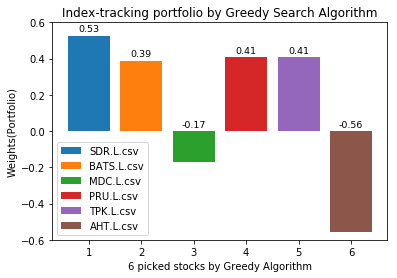

In [117]:
f8 = plt.figure(8)


plt.bar(1, weight_greedy[0],label = files[int(greedy_1)-1])  
plt.bar(2, weight_greedy[1],label = files[int(greedy_2)-1])
plt.bar(3, weight_greedy[2],label = files[int(greedy_3)-1])  
plt.bar(4, weight_greedy[3],label = files[int(greedy_4)-1])
plt.bar(5, weight_greedy[4],label = files[int(greedy_5)-1])  
plt.bar(6, weight_greedy[5],label = files[int(greedy_6)-1])
plt.text(1, 0.54, '0.53', ha='center', va= 'bottom',fontsize=9.5)
plt.text(2, 0.40, '0.39', ha='center', va= 'bottom',fontsize=9.5)
plt.text(3, 0.01, '-0.17', ha='center', va= 'bottom',fontsize=9.5)
plt.text(4, 0.42, '0.41', ha='center', va= 'bottom',fontsize=9.5)
plt.text(5, 0.42, '0.41', ha='center', va= 'bottom',fontsize=9.5)
plt.text(6, 0.01, '-0.56', ha='center', va= 'bottom',fontsize=9.5)
plt.legend( loc='best')
#plt.grid
plt.ylabel("Weights(Portfolio)")  
plt.xlabel("6 picked stocks by Greedy Algorithm")
# plt with same scale
plt.ylim(-0.6,0.6)
#plt.xlim(0.09,0.205)
plt.title('Index-tracking portfolio by Greedy Search Algorithm')
plt.savefig("Index-tracking portfolio by Greedy Search Algorithm.PNG", dpi = 600)
plt.show()

# Sparse Index Tracking Portfolio

In [149]:
# obtain data from matlab
x1 = eng.workspace['x1']
y1 = eng.workspace['y1']

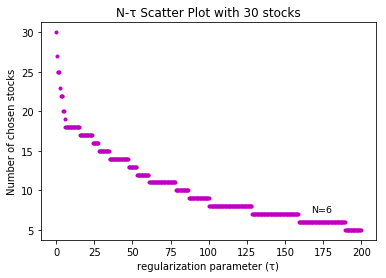

In [159]:
f9 = plt.figure(9)
#plt.plot(x,y, linewidth = '2', label = "Efficient Frontier of A1,A2,A3")
plt.scatter(x1,y1, c='m', marker='.', linewidths= '1')
plt.text(174, 7, 'N=6', ha='center', va= 'bottom',fontsize=9.5)
#plt.legend(loc='upper left')
#plt.grid()
plt.title('N-τ Scatter Plot with 30 stocks')  
plt.ylabel("Number of chosen stocks")  
plt.xlabel("regularization parameter (τ)")
# plt with same scale
#plt.ylim(0,30)
#plt.xlim(0,0.205)
plt.savefig("N-τ Scatter Plot with 30 stocks.PNG", dpi = 600)
plt.show()

In [172]:
# obtain data from matlab
re_6 = eng.workspace['re_6'] # chosen storcks
re6_w = eng.workspace['re6_w'] # weight
print(re_6)
print(re6_w)

[[3.0],[6.0],[16.0],[17.0],[19.0],[20.0]]
[[0.27307806739349566],[0.06555168237160124],[-0.0033360381242771484],[0.05170760283542625],[0.5277849209021805],[0.08521364853427085]]


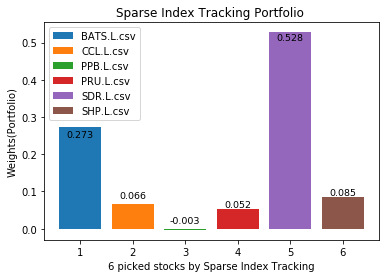

In [183]:
f10 = plt.figure(10)


plt.bar(1, 0.27307806739349566,label = files[2])  
plt.bar(2, 0.06555168237160124,label = files[5])
plt.bar(3, -0.0033360381242771484,label = files[15])  
plt.bar(4, 0.05170760283542625,label = files[16])
plt.bar(5, 0.5277849209021805,label = files[18])  
plt.bar(6, 0.08521364853427085,label = files[19])
plt.text(1, 0.24, '0.273', ha='center', va= 'bottom',fontsize=9.5)
plt.text(2, 0.076, '0.066', ha='center', va= 'bottom',fontsize=9.5)
plt.text(3, 0.01, '-0.003', ha='center', va= 'bottom',fontsize=9.5)
plt.text(4, 0.053, '0.052', ha='center', va= 'bottom',fontsize=9.5)
plt.text(5, 0.5, '0.528', ha='center', va= 'bottom',fontsize=9.5)
plt.text(6, 0.086, '0.085', ha='center', va= 'bottom',fontsize=9.5)
plt.legend( loc='best')
#plt.grid
plt.ylabel("Weights(Portfolio)")  
plt.xlabel("6 picked stocks by Sparse Index Tracking")
# plt with same scale
#plt.ylim(-0.6,0.6)
#plt.xlim(0.09,0.205)
plt.title('Sparse Index Tracking Portfolio ')
plt.savefig("Sparse Index Tracking Portfolio.PNG", dpi = 600)
plt.show()

In [185]:
weight_1 = np.array([0.5256276368102086,0.3854084940223933,-0.17129198162352421,0.4099502094245179,0.4099502094245179,-0.5596445662855617])
print(weight_1)
weight_2 = np.array([0.27307806739349566,0.06555168237160124,-0.0033360381242771484,0.05170760283542625,0.5277849209021805,0.08521364853427085])
print(weight_2)

[ 0.52562764  0.38540849 -0.17129198  0.40995021  0.40995021 -0.55964457]
[ 0.27307807  0.06555168 -0.00333604  0.0517076   0.52778492  0.08521365]


In [200]:
asstes_1 = [all_returns[:,18],all_returns[:,2],all_returns[:,13],all_returns[:,16],all_returns[:,25],all_returns[:,0]]
print(len(asstes_1))
print(len(asstes_1[0]))

6
758


In [201]:
asstes_2 = [all_returns[:,2],all_returns[:,5],all_returns[:,15],all_returns[:,16],all_returns[:,18],all_returns[:,19]]
print(len(asstes_2))
print(len(asstes_2[0]))

6
758


In [204]:
method_1 = shouru(asstes_1, weight_1) # greedy
result_1 = method_1[0] + method_1[1] + method_1[2]+ method_1[3] + method_1[4]+ method_1[5]

method_2 = shouru(asstes_2, weight_2) # re
result_2 = method_2[0] + method_2[1] + method_2[2]+ method_2[3] + method_2[4]+ method_2[5]

print(result_1.sum())
print(result_2.sum())

-117.52940235935063
-202.5354225617375


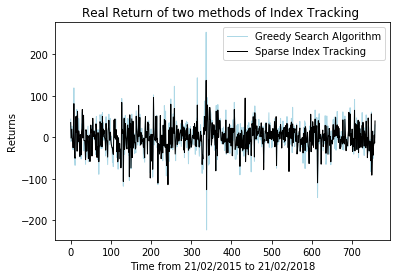

In [208]:
f11 = plt.figure(11)
time = np.arange(T)  
plt.plot(time,result_1, linewidth = '1', color='lightblue', label = "Greedy Search Algorithm")
plt.plot(time,result_2, linewidth = '1', color='k', label = "Sparse Index Tracking")

#plt.grid()
plt.legend(loc='upper right')
plt.title('Real Return of two methods of Index Tracking ')  
plt.xlabel("Time from 21/02/2015 to 21/02/2018")  
plt.ylabel("Returns")
# plt with same scale
#plt.ylim(0,0.25)
#plt.xlim(0.09,0.205)
plt.savefig("Real Return of two methods of Index Tracking.PNG", dpi = 600)
plt.show()